In [ ]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import matplotlib.patches as patches
import re
import random
import pickle
import cv2
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

train_csv=pd.read_csv('archive/train.csv')
train_csv.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [ ]:

train_csv.shape

(7095, 3)

In [ ]:

Image_id=[]
label=[]
train_folder_path='archive/train_images'
for i in os.listdir(train_folder_path): #https://www.geeksforgeeks.org/python-os-listdir-method/
    for j in range(1,5):
        Image_id.append(i)
        label.append(j)

x={'ImageId':Image_id,'ClassId':label}  #https://www.geeksforgeeks.org/creating-a-pandas-dataframe/
train_img=pd.DataFrame(x)
train_img.head(10)

,ImageId,ClassId
0,0002cc93b.jpg,1
1,0002cc93b.jpg,2
2,0002cc93b.jpg,3
3,0002cc93b.jpg,4
4,00031f466.jpg,1
5,00031f466.jpg,2
6,00031f466.jpg,3
7,00031f466.jpg,4
8,000418bfc.jpg,1
9,000418bfc.jpg,2


In [ ]:

#https://www.geeksforgeeks.org/python-get-unique-values-list/
image_size=set()
train_folder_path='archive/train_images'
for i in os.listdir(train_folder_path): #https://www.geeksforgeeks.org/python-os-listdir-method/
  image_size.add(cv2.imread(train_folder_path+'/'+i).shape)
unique_image=list(image_size)
for x in unique_image:
  print (x)


(256, 1600, 3)


In [ ]:

#https://stackoverflow.com/questions/53645882/pandas-merging-10
df=pd.merge(train_img,train_csv,how='outer',on=['ImageId','ClassId'])
df.fillna('',inplace=True)
df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg,2,
2,0002cc93b.jpg,3,
3,0002cc93b.jpg,4,
4,00031f466.jpg,1,


In [ ]:

#https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/
train=pd.pivot_table(df,values='EncodedPixels',index='ImageId',columns='ClassId',aggfunc=np.sum).astype(str)
train=train.reset_index()
train.columns=['image_id','rle_1','rle_2','rle_3','rle_4']
train.head()

,image_id,rle_1,rle_2,rle_3,rle_4
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,
1,00031f466.jpg,,,,
2,000418bfc.jpg,,,,
3,000789191.jpg,,,,
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,


In [ ]:

#Stratified corrosion is a type of corrosion that progresses parallel to the metal surface in such a manner that underlying layers are gradually separated.
#For stratified sampling, we have taken stratified based on minority label priority
#https://economictimes.indiatimes.com/definition/stratified-sampling
defect=[]
stratify=[]
for i in range(len(train)):
    if (train['rle_1'][i] != '' or train['rle_2'][i] != '' or train['rle_3'][i] != '' or train['rle_4'][i] != ''):
         defect.append(1)
    else:
         defect.append(0)

    if train['rle_1'][i] != '':
         stratify.append(1)
    elif train['rle_2'][i] != '':
        stratify.append(2)
    elif train['rle_3'][i] != '':
        stratify.append(3)
    elif train['rle_4'][i] != '':
        stratify.append(4)
    else:
        stratify.append(0)
train['defect']=defect
train['stratify']=stratify

In [ ]:
train.head()

,image_id,rle_1,rle_2,rle_3,rle_4,defect,stratify
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,,1,1
1,00031f466.jpg,,,,,0,0
2,000418bfc.jpg,,,,,0,0
3,000789191.jpg,,,,,0,0
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,,1,3


In [ ]:
defect_1,defect_2,defect_3,defect_4=[],[],[],[]
for i in range(len(train)):
    if train['rle_1'][i] != '':
         defect_1.append(1)
    else:
         defect_1.append(0)
    if train['rle_2'][i] != '':
         defect_2.append(1)
    else:
         defect_2.append(0)
    if train['rle_3'][i] != '':
         defect_3.append(1)
    else:
         defect_3.append(0)
    if train['rle_4'][i] != '':
        defect_4.append(1)
    else:
        defect_4.append(0)
train['defect_1']=defect_1
train['defect_2']=defect_2
train['defect_3']=defect_3
train['defect_4']=defect_4
train['total_defects']=train['defect_1']+ train['defect_2']+ train['defect_3']+ train['defect_4']
train.head()

,image_id,rle_1,rle_2,rle_3,rle_4,defect,stratify,defect_1,defect_2,defect_3,defect_4,total_defects
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,,1,1,1,0,0,0,1
1,00031f466.jpg,,,,,0,0,0,0,0,0,0
2,000418bfc.jpg,,,,,0,0,0,0,0,0,0
3,000789191.jpg,,,,,0,0,0,0,0,0,0
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,,1,3,0,0,1,0,1


In [ ]:

train.shape

(12568, 12)

In [ ]:

with open('archive/data.pkl','wb') as f:
     pickle.dump(train,f)

In [ ]:

test_image=[i for i in os.listdir('archive/test_images')]

In [ ]:

len(test_image)

5506

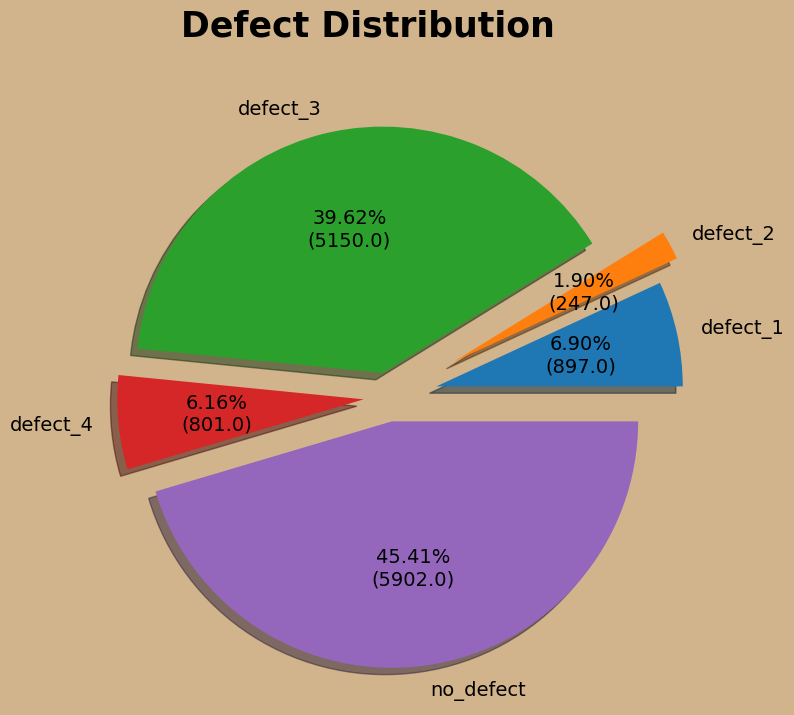

In [ ]:

#https://www.askpython.com/python/plot-customize-pie-chart-in-python
defect_1,defect_2,defect_3,defect_4,no_defect=0,0,0,0,0
def func(v,p): #https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
    a=p*sum(v)/100
    return "{:.2f}%\n({:.1f})".format(p,a)
for i in range(len(train)):
    if train['rle_1'][i] != '':
        defect_1+=1
    if train['rle_2'][i] != '':
        defect_2+=1
    if train['rle_3'][i] != '':
        defect_3+=1
    if train['rle_4'][i] != '':
        defect_4+=1
    if train['defect'][i] == 0:
        no_defect+=1
labels=['defect_1','defect_2','defect_3','defect_4','no_defect']
sizes=[defect_1,defect_2,defect_3,defect_4,no_defect]
explode=(0.2,0.3,0.1,0.1,0.1)
fig,ax=plt.subplots(figsize=(16,8))
ax.pie(sizes,explode=explode,labels=labels,textprops={'fontsize': 14},autopct=lambda p: func(sizes,p),shadow=True)
fig.suptitle('Defect Distribution',fontsize=25,fontweight='bold')
fig.set_facecolor("tan")
plt.show()

In [ ]:

def patch1(bar,ax):
  #https://stackoverflow.com/questions/52080991/display-percentage-above-bar-chart-in-matplotlib
  for p in bar.patches:
        width=p.get_width()
        height=p.get_height()
        x,y=p.get_xy()
        ax.annotate('{}'.format(height),(x+width/2,y+height*1.02),ha='center',fontsize=14)

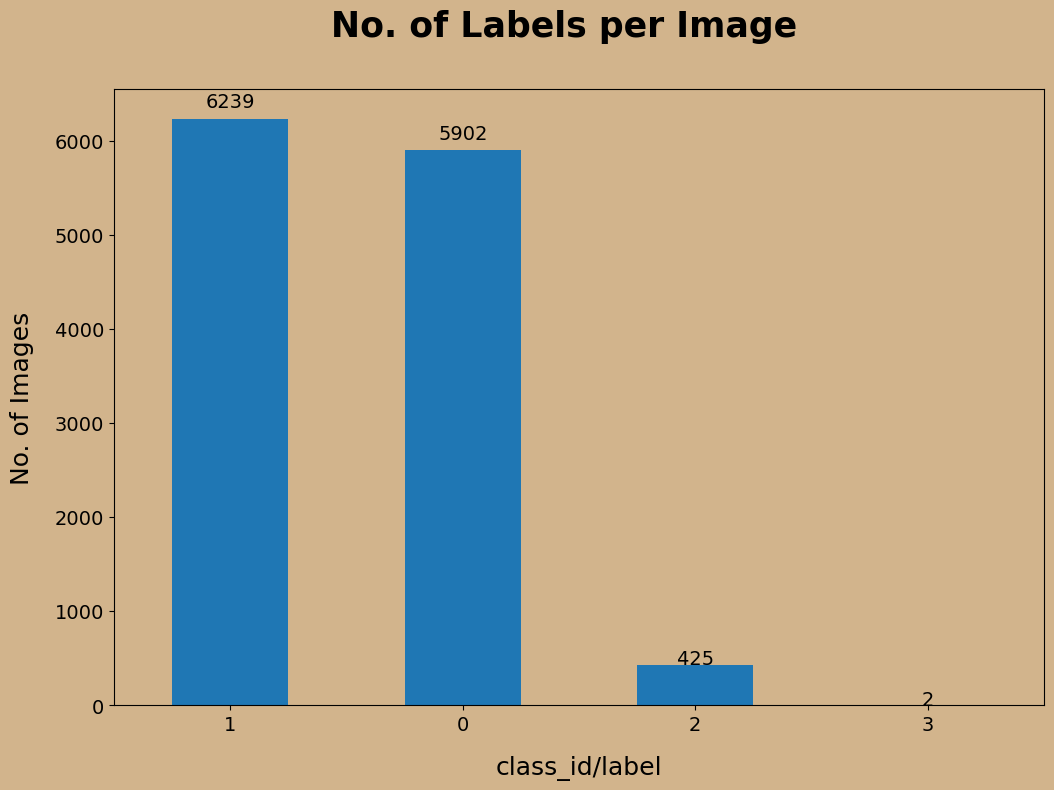

In [ ]:

fig,ax=plt.subplots(figsize=(12,8))
a=train['total_defects'].value_counts().plot(kind='bar')
patch1(a,ax)
ax.set_xlabel("class_id/label",fontsize=18,labelpad=15)
ax.set_ylabel("No. of Images",fontsize=18,labelpad=15)
plt.xticks(rotation='horizontal',fontsize=14)
plt.yticks(fontsize=14)
fig.suptitle('No. of Labels per Image',fontsize=25,fontweight='bold')
ax.set_facecolor("tan")
fig.set_facecolor("tan")
plt.show()

In [ ]:
#https://www.kaggle.com/paulorzp/rle-functions-run-lenght-encode-decode
def rle_to_mask(rle):
    # CONVERT RLE TO MASK
    if (pd.isnull(rle))|(rle=='')|(rle=='-1'):
        return np.zeros((256,1600) ,dtype=np.uint8)

    height= 256
    width = 1600
    mask= np.zeros( width*height ,dtype=np.uint8)

    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]-1
    lengths = array[1::2]
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])]=1

    return mask.reshape((height,width),order='F')

In [ ]:

def plot_mask(rle_defect,k):
    x=rle_defect.columns[2]
    train_folder_path='archive/train_images/'
  # Create figure and axes
    fig,ax=plt.subplots(4,2,figsize=(14,9))
    fig.suptitle('Defect_'+str(k)+'_Images',fontsize=20,fontweight='bold')
    for i in range(4):
            image_id=rle_defect['image_id'][i]
            rle=rle_defect[x][i]
            im=Image.open(train_folder_path+str(image_id))
            ax[i,0].imshow(im)
            ax[i,0].set_title(image_id)
            mask=rle_to_mask(rle)
            ax[i,1].imshow(mask)
            ax[i,1].set_title("Mask for "+str(image_id))
    fig.set_facecolor("tan")
    plt.show()

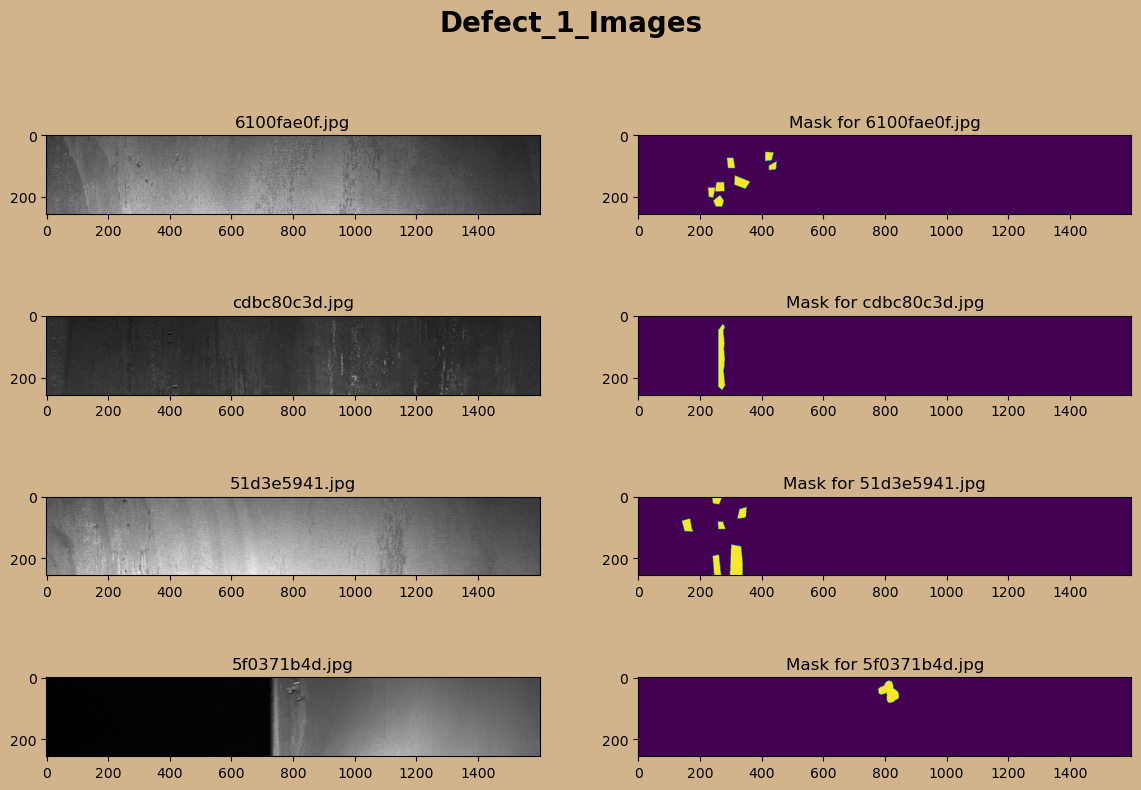

In [ ]:

#https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/
rle_defect=train[train['defect_1']==1]
rle_defect=rle_defect[['image_id','rle_1']]
rle_defect=rle_defect.sample(n=4)
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,1)

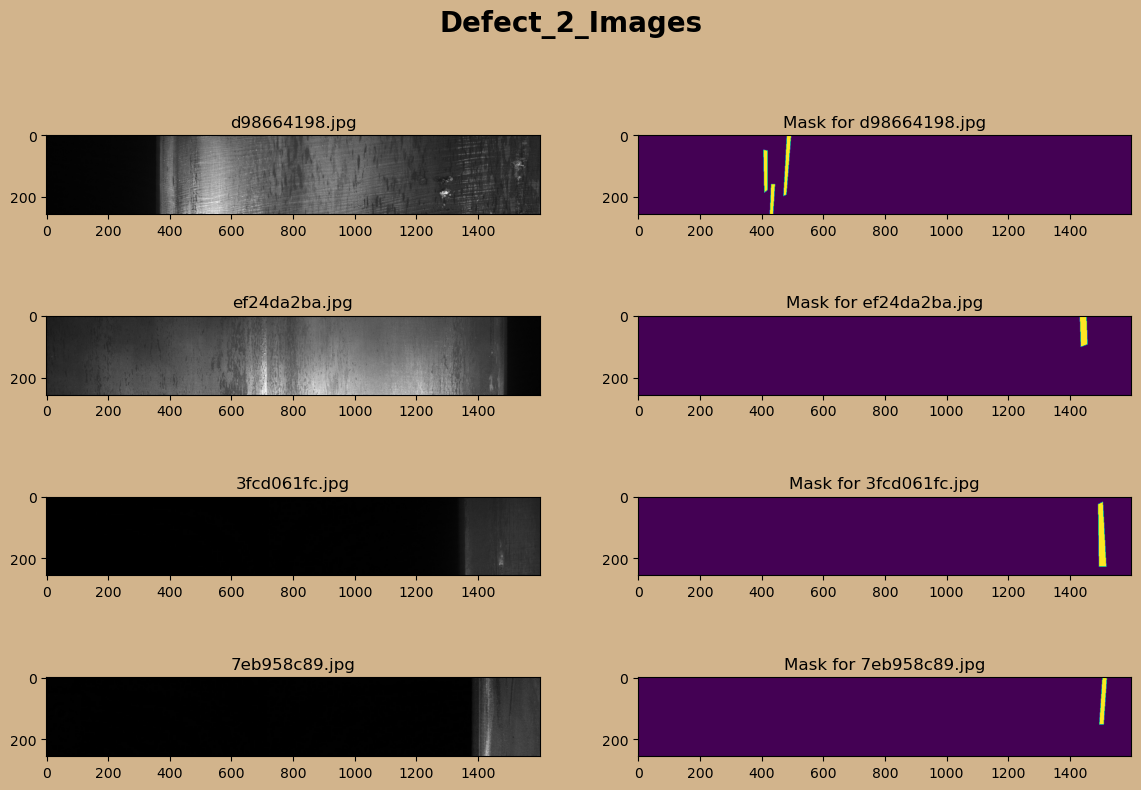

In [ ]:

#https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/
rle_defect=train[train['defect_2']==1]
rle_defect=rle_defect[['image_id','rle_2']]
rle_defect=rle_defect.sample(n=4)
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,2)

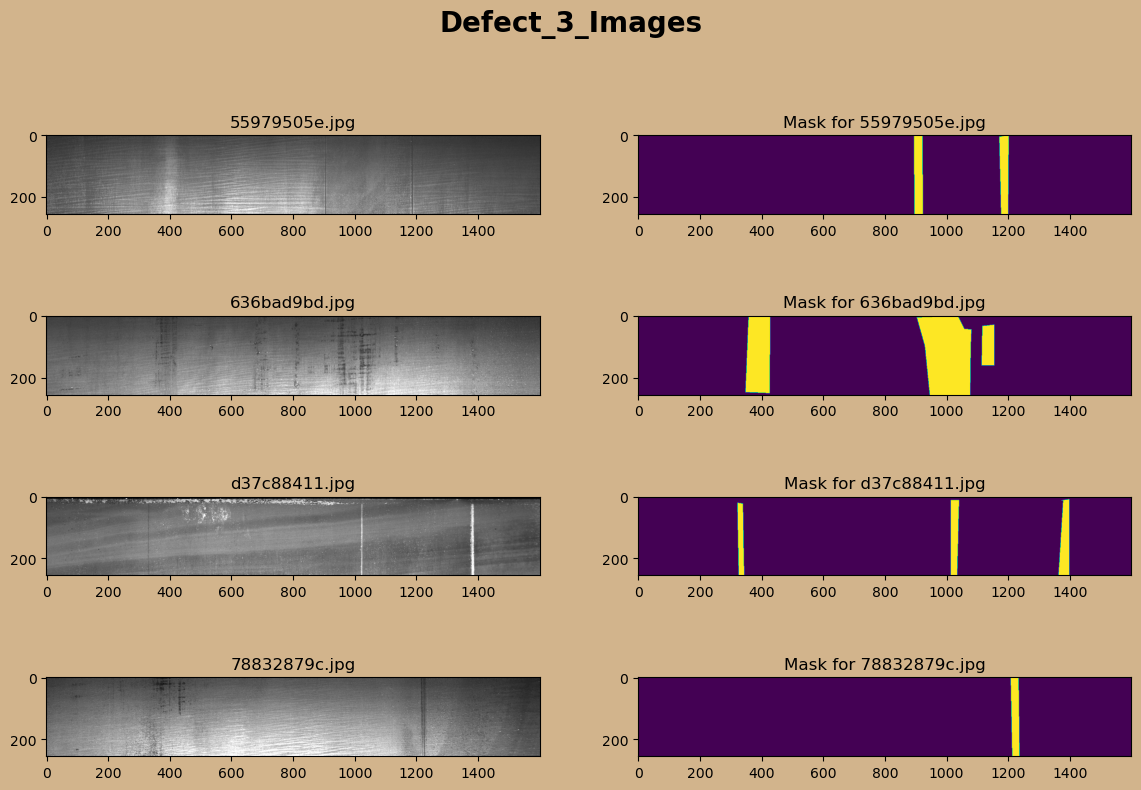

In [ ]:

#https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/
rle_defect=train[train['defect_3']==1]
rle_defect=rle_defect[['image_id','rle_3']]
rle_defect=rle_defect.sample(n=4)
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,3)

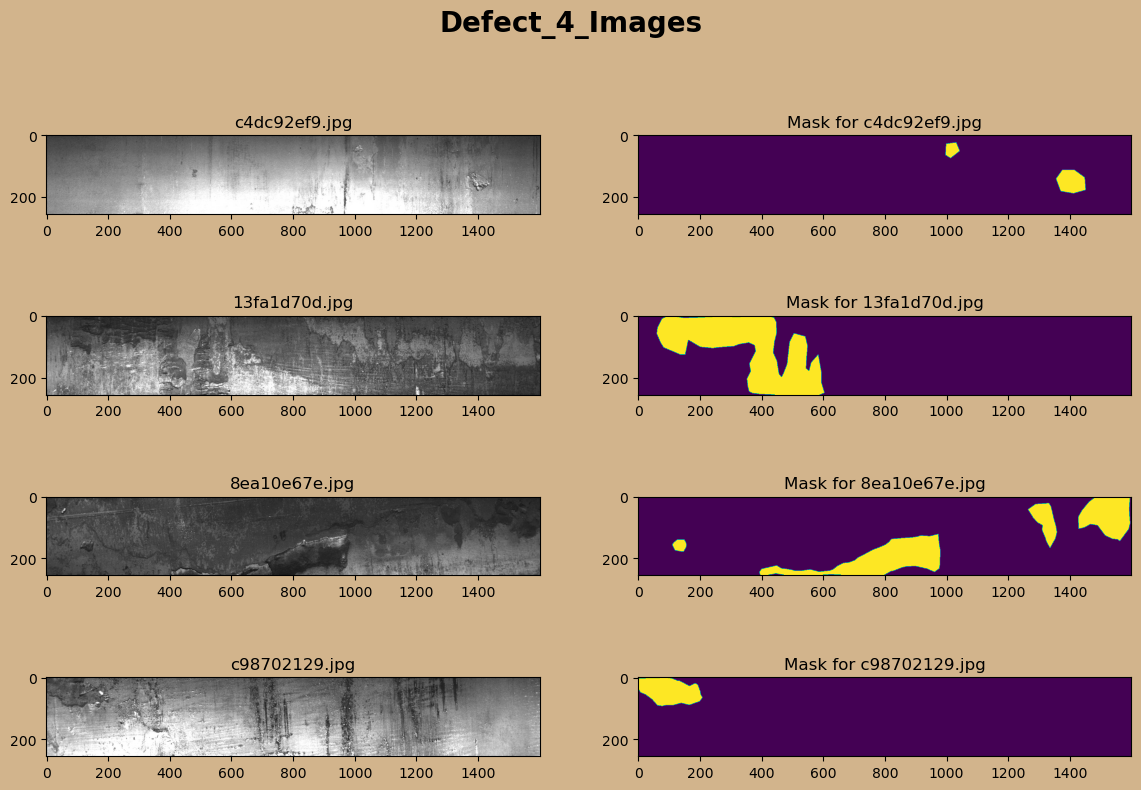

In [ ]:

rle_defect=train[train['defect_4']==1]
rle_defect=rle_defect[['image_id','rle_4']]
rle_defect=rle_defect.sample(n=4)
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,4)


In [ ]:

def mask_areas(rle_defect):
    area=[]
    for i in rle_defect:
        mask=np.sum(rle_to_mask(i))
        area.append(np.sum(rle_to_mask(i)))
    return area

In [ ]:
rle_defect=train[train['defect_1']==1]
rle_defect=rle_defect['rle_1']
rle_1_area=mask_areas(rle_defect)

rle_defect=train[train['defect_2']==1]
rle_defect=rle_defect['rle_2']
rle_2_area=mask_areas(rle_defect)

rle_defect=train[train['defect_3']==1]
rle_defect=rle_defect['rle_3']
rle_3_area=mask_areas(rle_defect)

rle_defect=train[train['defect_4']==1]
rle_defect=rle_defect['rle_4']
rle_4_area=mask_areas(rle_defect)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle
import matplotlib.patches as patches
import re
import random
from sklearn.model_selection import train_test_split
import cv2
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from PIL import Image
import tensorflow as tf
from keras.layers import GlobalAveragePooling2D,Dense,Conv2D,BatchNormalization,Dropout
import keras
from keras import backend as K
from keras.models import Model,load_model
from tensorflow.python.framework.ops import disable_eager_execution
from keras.regularizers import l2
import datetime
%load_ext tensorboard

In [ ]:
with open('archive/data.pkl','rb') as f:
     train=pickle.load(f)

In [ ]:
train.head()


,image_id,rle_1,rle_2,rle_3,rle_4,defect,stratify,defect_1,defect_2,defect_3,defect_4,total_defects
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,,1,1,1,0,0,0,1
1,00031f466.jpg,,,,,0,0,0,0,0,0,0
2,000418bfc.jpg,,,,,0,0,0,0,0,0,0
3,000789191.jpg,,,,,0,0,0,0,0,0,0
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,,1,3,0,0,1,0,1


In [ ]:

train.shape

(12568, 12)

In [ ]:

def f1_score(y_true, y_pred):
    #https://aakashgoel12.medium.com/how-to-add-user-defined-function-get-f1-score-in-keras-metrics-3013f979ce0d
    #https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras
    true_positives=K.sum(K.round(K.clip(y_true*y_pred,0,1)))   #calculates number of true positives
    possible_positives=K.sum(K.round(K.clip(y_true,0,1)))      #calculates number of actual positives
    predicted_positives=K.sum(K.round(K.clip(y_pred,0,1)))

    #K.epsilon takes care of non-zero divisions
    #was modified by adding the constant epsilon, in order to avoid division by 0. Thus NaN will not be computed.
    precision=true_positives/(predicted_positives +K.epsilon())
    recall=true_positives/(possible_positives+K.epsilon())
    f1_val=2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
import tensorflow as tf

def f1_score(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.greater(y_pred, 0.5), tf.float32)  # Threshold predictions

    true_positives = tf.reduce_sum(y_true * y_pred, axis=0)
    possible_positives = tf.reduce_sum(y_true, axis=0)
    predicted_positives = tf.reduce_sum(y_pred, axis=0)

    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())

    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return tf.reduce_mean(f1)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train,x_test=train_test_split(train,test_size=0.10,stratify=train['stratify'],random_state=0)
x_train,x_val=train_test_split(x_train,test_size=0.20,stratify=x_train['stratify'],random_state=0)
x_train=x_train[['image_id','defect']]
x_val=x_val[['image_id','defect']]
x_test=x_test[['image_id','defect']]
print("x_train {}".format(x_train.shape),"  x_val {}".format(x_val.shape)," x_test {}".format(x_test.shape))


x_train (9048, 2)   x_val (2263, 2)  x_test (1257, 2)


In [ ]:
#https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.1,
                                 zoom_range=0.1,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 rotation_range=60)

val_datagen=ImageDataGenerator(rescale=1./255)


train_folder_path='archive/train_images/'

train_image_generator=train_datagen.flow_from_dataframe(dataframe=x_train.astype(str),
                                                  directory=train_folder_path,
                                                  x_col="image_id",
                                                  y_col="defect",
                                                  seed=42,
                                                  shuffle=True,
                                                  batch_size=32,
                                                  class_mode="binary",
                                                  target_size=(256,512))

val_image_generator=val_datagen.flow_from_dataframe(dataframe=x_val.astype(str),
                                                  directory=train_folder_path,
                                                  x_col="image_id",
                                                  y_col="defect",
                                                  batch_size=32,
                                                  seed=42,
                                                  shuffle=True,
                                                  class_mode="binary",
                                                  target_size=(256,512))

Found 9048 validated image filenames belonging to 2 classes.
Found 2263 validated image filenames belonging to 2 classes.


In [ ]:
#https://keras.io/api/applications/xception/
base_model=tf.keras.applications.xception.Xception(input_shape=(256,512,3),include_top=False)
base_model.trainable=False

m=base_model.output
# add a global average pooling layer
#https://stackoverflow.com/questions/49295311/what-is-the-difference-between-flatten-and-globalaveragepooling2d-in-keras
m=GlobalAveragePooling2D()(m)

# add fully-connected layers
m=Dense(1024,activation='relu')(m)
m=BatchNormalization()(m)   #https://www.analyticsvidhya.com/blog/2021/03/introduction-to-batch-normalization/
m=Dropout(0.3)(m)

#https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/
m=Dense(512,activation='relu')(m)
m=BatchNormalization()(m)
m= Dropout(0.3)(m)

m=Dense(64,activation='relu')(m)
m=BatchNormalization()(m)
m=Dropout(0.3)(m)

#prediction layer
output=Dense(1,activation='sigmoid')(m)   #Binary Classification thus sigmoid is used

model=Model(inputs=base_model.input,outputs=output)
model._name="Binary_Classification_Model"
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 512, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 127, 255, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 127, 255, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 127, 255, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 125, 253, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 125, 253, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 125, 253, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 125, 253, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 125, 253, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 125, 253, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 125, 253, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 125, 253, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 63, 127, 128)      │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 63, 127, 128)      │               

 Total params: 23,523,753 (89.74 MB)

 Trainable params: 2,659,073 (10.14 MB)

 Non-trainable params: 20,864,680 (79.59 MB)

In [ ]:
import os
import datetime
import tensorflow as tf

# Define the path to save the model
checkpoint_filepath = 'Downloads/archive/binary_Xception_2.keras'  # Ensure the correct path and extension

# Create TensorBoard callback
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True)

# Define the ModelCheckpoint callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_f1_score',  # Monitor validation F1 score
    mode='max',             # Mode for saving the best model
    save_best_only=True     # Save only the best model
)

# Compile the model with f1_score as a metric
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["acc", f1_score])

# Define callbacks including TensorBoard and ModelCheckpoint
callbacks = [model_checkpoint_callback, tensorboard]

# Train the model
history = model.fit(
    train_image_generator,
    validation_data=val_image_generator,
    epochs=20,
    verbose=1,
    callbacks=callbacks
)


Epoch 1/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 3100s 11s/step - acc: 0.6982 - f1_score: 0.5210 - loss: 0.6154 - val_acc: 0.8131 - val_f1_score: 0.5522 - val_loss: 0.4137
Epoch 2/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 2722s 10s/step - acc: 0.7645 - f1_score: 0.5307 - loss: 0.4712 - val_acc: 0.8202 - val_f1_score: 0.5539 - val_loss: 0.3812
Epoch 3/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 2307s 8s/step - acc: 0.7966 - f1_score: 0.5357 - loss: 0.4242 - val_acc: 0.8502 - val_f1_score: 0.5155 - val_loss: 0.3353
Epoch 4/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 2856s 10s/step - acc: 0.8041 - f1_score: 0.5296 - loss: 0.4074 - val_acc: 0.8453 - val_f1_score: 0.5050 - val_loss: 0.3433
Epoch 5/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 3123s 11s/step - acc: 0.8123 - f1_score: 0.5220 - loss: 0.3962 - val_acc: 0.8586 - val_f1_score: 0.5347 - val_loss: 0.3163
Epoch 6/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 2804s 10s/step - acc: 0.8132 - f1_score: 0.5429 - loss: 0.3779 - val_acc: 0.8356 - val_f1_score: 0.4818 - val_loss: 0.3650
Epoch 7/20
283/283 ━━━━

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 66696), started 2 days, 22:02:24 ago. (Use '!kill 66696' to kill it.)

In [ ]:
model=load_model(r'C:/Users/Dell/Downloads/archive/binary_Xception_2.keras',custom_objects={'f1_score':f1_score})
model.save('C:/Users/Dell/Downloads/archive/binary_Xception_2.keras')

In [ ]:
train_image_generator=val_datagen.flow_from_dataframe(dataframe=x_train.astype(str),
                                                  directory=train_folder_path,
                                                  x_col="image_id",
                                                  y_col="defect",
                                                  batch_size=32,
                                                  shuffle=False,
                                                  class_mode="binary",
                                                  target_size=(256,512))


val_image_generator=val_datagen.flow_from_dataframe(dataframe=x_val.astype(str),
                                                  directory=train_folder_path,
                                                  x_col="image_id",
                                                  y_col="defect",
                                                  batch_size=32,
                                                  shuffle=False,
                                                  class_mode="binary",
                                                  target_size=(256,512))

test_image_generator=val_datagen.flow_from_dataframe(dataframe=x_test.astype(str),
                                                  directory=train_folder_path,
                                                  x_col="image_id",
                                                  y_col="defect",
                                                  batch_size=32,
                                                  shuffle=False,
                                                  class_mode="binary",
                                                  target_size=(256,512))

Found 9048 validated image filenames belonging to 2 classes.
Found 2263 validated image filenames belonging to 2 classes.
Found 1257 validated image filenames belonging to 2 classes.


In [ ]:

print('Training Dataset:\n')
print(model.evaluate(train_image_generator,verbose=1))
print("="*100)
print('\nValidation Dataset:\n')
print(model.evaluate(val_image_generator,verbose=1))
print("="*100)
print('\nTest Dataset:\n')
print(model.evaluate(test_image_generator,verbose=1))


Training Dataset:

283/283 ━━━━━━━━━━━━━━━━━━━━ 1961s 7s/step - acc: 0.7736 - f1_score: 0.4507 - loss: 0.4530
[0.4572276771068573, 0.770667552947998, 0.44316741824150085]

Validation Dataset:

71/71 ━━━━━━━━━━━━━━━━━━━━ 605s 9s/step - acc: 0.7489 - f1_score: 0.4254 - loss: 0.4836
[0.4571871757507324, 0.7680070996284485, 0.4363296926021576]

Test Dataset:

40/40 ━━━━━━━━━━━━━━━━━━━━ 337s 8s/step - acc: 0.7756 - f1_score: 0.4502 - loss: 0.4609
[0.46742621064186096, 0.7732697129249573, 0.4512057900428772]


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

# Load the trained model
model=load_model(r'C:/Users/Dell/Downloads/archive/binary_Xception_2.keras',custom_objects={'f1_score':f1_score})

# Create an ImageDataGenerator for test-time augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Load the test data
val_generator =datagen.flow_from_dataframe(dataframe=x_val.astype(str),
                                                  directory=train_folder_path,
                                                  x_col="image_id",
                                                  y_col="defect",
                                                  batch_size=32,
                                                  shuffle=False,
                                                  class_mode="binary",
                                                  target_size=(256,512))
print('\nValidation Dataset:\n')
print(model.evaluate(val_generator,verbose=1))

Found 2263 validated image filenames belonging to 2 classes.

Validation Dataset:

71/71 ━━━━━━━━━━━━━━━━━━━━ 629s 9s/step - acc: 0.7745 - f1_score: 0.5200 - loss: 0.4523
[0.4381044805049896, 0.7794962525367737, 0.5141189098358154]
